# My First Jupyter Notebook

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
from pandas.io.data import DataReader
from datetime import date
from dateutil.relativedelta import relativedelta

azo = DataReader("AZO", "yahoo", date.today() + relativedelta(months=-3))

In [58]:
azo['Diff'] = azo['High'] - azo['Low']
azo.iloc[[0,1], [0,2]]    # [rows, cols]
azo.loc['2015-06-22':'2015-06-24', ['High', 'Low']]
azo.ix[0:5, ['High', 'Low', 'Close']]

,High,Low,Close
Date,,,
2015-06-22,684.489990,679.570007,681.500000
2015-06-23,685.869995,681.700012,685.539978
2015-06-24,684.409973,678.119995,679.640015
2015-06-25,684.700012,678.580017,680.309998
2015-06-26,683.510010,676.299988,677.469971


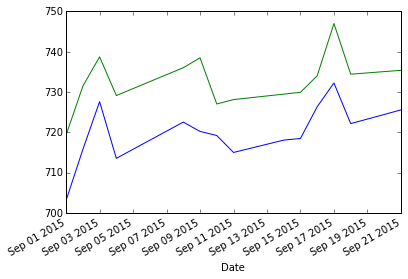

In [81]:
high = azo['High'].loc['2015-09-01':'2015-09-30']
low = azo['Low'].loc['2015-09-01':'2015-09-30']
high.plot(kind='line', style='g');
low.plot(kind='line', style='b');

In [6]:
from dateutil.parser import parse

ATHLETES_FILE = '../hw/hw2-athletes.csv'

# Some dates are of the form '28/02/1986 (KOR)', 
#   so a custom parser is needed to grab the portion before the first space
def parse_date(date_str):
    return parse(date_str.split(' ')[0])

athletes = pd.read_csv(ATHLETES_FILE, parse_dates=['birth_date'], date_parser=parse_date)

In [107]:
sexes = athletes['sex']
sexes == 'M'
print('# Males: ', sexes[sexes == 'M'].count())
print('# Females: ', sexes[sexes == 'F'].count())
print('# Total: ', sexes.count())

# Males:  5756
# Females:  4628
# Total:  10384


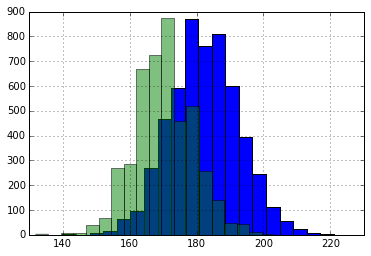

In [117]:
males = athletes[athletes['sex'] == 'M']
females = athletes[athletes['sex'] == 'F']
males['height'].hist(color='b', bins=20)
females['height'].hist(color='g', bins=20, alpha=0.5)